nan-value filled
MonthlyRevenue : 50887, 삭제된 수 : 1
MonthlyMinutes : 50883, 삭제된 수 : 4
TotalRecurringCharge : 50874, 삭제된 수 : 9
DirectorAssistedCalls : 50874, 삭제된 수 : 0
OverageMinutes : 50870, 삭제된 수 : 4
RoamingCalls : 50862, 삭제된 수 : 8
PercChangeMinutes : 50860, 삭제된 수 : 2
DroppedCalls : 50856, 삭제된 수 : 4
BlockedCalls : 50852, 삭제된 수 : 4
UnansweredCalls : 50842, 삭제된 수 : 10
CustomerCareCalls : 50840, 삭제된 수 : 2
ThreewayCalls : 50836, 삭제된 수 : 4
ReceivedCalls : 50830, 삭제된 수 : 6
OutboundCalls : 50827, 삭제된 수 : 3
InboundCalls : 50823, 삭제된 수 : 4
PeakCallsInOut : 50821, 삭제된 수 : 2
OffPeakCallsInOut : 50806, 삭제된 수 : 15
DroppedBlockedCalls : 50792, 삭제된 수 : 14
CallForwardingCalls : 50779, 삭제된 수 : 13
CallWaitingCalls : 50779, 삭제된 수 : 0
MonthsInService : 50778, 삭제된 수 : 1
UniqueSubs : 50777, 삭제된 수 : 1
ActiveSubs : 50777, 삭제된 수 : 0
Handsets : 50773, 삭제된 수 : 4
HandsetModels : 50773, 삭제된 수 : 0
CurrentEquipmentDays : 50768, 삭제된 수 : 5
RetentionCalls : 50634, 삭제된 수 : 134
RetentionOffersAccepted : 50634, 삭제된 수 : 0


c:\Utils\anaconda3\envs\deep_learning\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Utils\anaconda3\envs\deep_learning\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Utils\anaconda3\envs\deep_learning\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Utils\anaconda3\envs\d

Selected 'MonthlyMinutes' with F1 Score: 0.058437294812869335
Selected 'RetentionCalls' with F1 Score: 0.07722007722007722
Selected 'MadeCallToRetentionTeam' with F1 Score: 0.07953816549069917
Selected 'PercChangeMinutes' with F1 Score: 0.0890302066772655
Selected 'OwnsMotorcycle' with F1 Score: 0.09134157944814462
Selected 'Homeownership' with F1 Score: 0.09079365079365079
Selected 'RetentionOffersAccepted' with F1 Score: 0.08978032473734479
Selected 'TruckOwner' with F1 Score: 0.08983752787511946
Selected 'OwnsComputer' with F1 Score: 0.09238611022618669
Selected 'PrizmCode' with F1 Score: 0.0864
Selected 'OutboundCalls' with F1 Score: 0.08394745273950657
Selected 'HandsetModels' with F1 Score: 0.08277189605389798
Selected 'RVOwner' with F1 Score: 0.0828782524895599
Selected 'CallWaitingCalls' with F1 Score: 0.07697283311772316
Selected 'PeakCallsInOut' with F1 Score: 0.07570365577483015
Selected 'CallForwardingCalls' with F1 Score: 0.08295819935691319
Selected 'NonUSTravel' with F1 

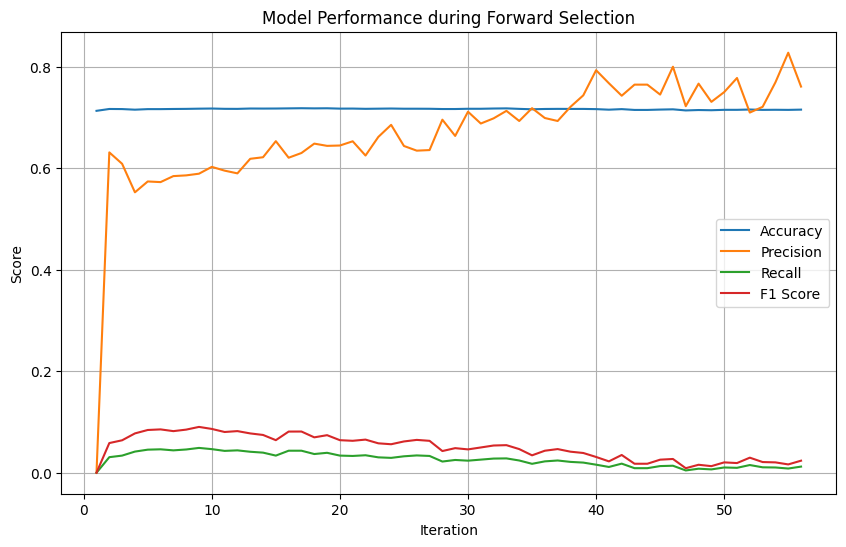


Final Model Performance:
Final Model Accuracy: 0.7154567901234568
Precision: 0.7608695652173914
Recall: 0.012048192771084338
F1 Score: 0.023720772619451033


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pre_data as eda
import matplotlib.pyplot as plt

# 데이터 로드 및 전처리
data = pd.read_csv('./data/train.csv', encoding='cp949')
preprocessed_data = eda.preprocessing(data)

# 1. 데이터 전처리 (범주형 데이터 변환 및 스케일링)
object_columns = preprocessed_data.select_dtypes(include=['object'])
convert_data, _ = eda.convert_category_into_integer(preprocessed_data, object_columns)

# 타겟 변수 및 독립 변수 설정
X = convert_data.drop('Churn', axis=1)
y = convert_data['Churn'].astype(int)

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# X: 피처 데이터셋, y: 타겟(종속 변수) 데이터셋
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 인덱스 재설정 (reset_index)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# 하이퍼 파라미터 설정 (RandomForest 사용)
params = {
    'n_estimators': 100,  # 트리 개수
    'max_depth': 5,       # 최대 트리 깊이
    'random_state': 42    # 재현성 보장
}

# RandomForest 모델을 사용한 전진 선택법
def forward_selection_random_forest(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(**params)  # 설정된 하이퍼 파라미터로 RandomForest 모델 선언

    selected_features = []  # 선택된 피처를 저장할 리스트
    remaining_features = list(X_train.columns)  # 남은 피처 리스트

    # 성능 지표를 저장할 리스트
    accuracy_list = []
    precision_list = []
    recall_list = []
    f1_list = []

    while remaining_features:
        best_feature = None
        best_score = 0

        # 각 남은 피처를 하나씩 추가해가며 성능 평가
        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_train_subset = X_train[current_features]
            X_test_subset = X_test[current_features]

            # 모델 학습
            model.fit(X_train_subset, y_train)

            # 모델 평가
            y_pred_class = model.predict(X_test_subset)

            accuracy = accuracy_score(y_test, y_pred_class)
            precision = precision_score(y_test, y_pred_class)
            recall = recall_score(y_test, y_pred_class)
            f1 = f1_score(y_test, y_pred_class)

            # 가장 성능이 좋은 피처 선택
            if f1 > best_score:  # F1 스코어를 기준으로 성능 평가
                best_score = f1
                best_feature = feature

        # 선택된 피처와 성능 저장
        if best_feature is not None:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)

            # 성능 지표를 리스트에 저장
            accuracy_list.append(accuracy)
            precision_list.append(precision)
            recall_list.append(recall)
            f1_list.append(f1)

            print(f"Selected '{best_feature}' with F1 Score: {best_score}")

    # 지표 그래프 시각화
    plot_metrics(accuracy_list, precision_list, recall_list, f1_list)

    return selected_features, model

# 성능 지표 그래프 그리기
def plot_metrics(accuracy, precision, recall, f1):
    epochs = range(1, len(accuracy) + 1)

    plt.figure(figsize=(10, 6))

    plt.plot(epochs, accuracy, label="Accuracy")
    plt.plot(epochs, precision, label="Precision")
    plt.plot(epochs, recall, label="Recall")
    plt.plot(epochs, f1, label="F1 Score")

    plt.xlabel("Iteration")
    plt.ylabel("Score")
    plt.title("Model Performance during Forward Selection")
    plt.legend()

    plt.grid(True)
    plt.show()

# 전진 선택법 실행
selected_features, final_model = forward_selection_random_forest(X_train, X_test, y_train, y_test)

# 최종 선택된 피처들로 최종 모델 학습 및 평가
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

final_model.fit(X_train_selected, y_train)
y_pred_class = final_model.predict(X_test_selected)

# 최종 성능 평가
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

# 최종 성능 출력
print("\nFinal Model Performance:")
print(f"Final Model Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
